# Jonathan Halverson
# Tuesday, April 12, 2016
# DrivenData.org: Predicting blood donations

Here we consider blood donation data from a clinic in Vietnam. We are given info about each volunteer. The response is whether or not they donated blood in March of 2007.

In [605]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [606]:
column_names = ['id_number', 'months_since_last', 'number_of_donations', 'total_volume', 'months_since_first', 'donation_in_march']
df = pd.read_csv('train_blood.csv', header=0, names=column_names)
df.head()

,id_number,months_since_last,number_of_donations,total_volume,months_since_first,donation_in_march
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [607]:
df.tail()

,id_number,months_since_last,number_of_donations,total_volume,months_since_first,donation_in_march
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
id_number              576 non-null int64
months_since_last      576 non-null int64
number_of_donations    576 non-null int64
total_volume           576 non-null int64
months_since_first     576 non-null int64
donation_in_march      576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [609]:
df.describe()

,id_number,months_since_last,number_of_donations,total_volume,months_since_first,donation_in_march
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [610]:
df[df['donation_in_march'] == 0].iloc[:,1:-1].corr().applymap(lambda x: round(x, 2))

,months_since_last,number_of_donations,total_volume,months_since_first
months_since_last,1.00,-0.10,-0.10,0.21
number_of_donations,-0.10,1.00,1.00,0.64
total_volume,-0.10,1.00,1.00,0.64
months_since_first,0.21,0.64,0.64,1.00


In [611]:
df[df['donation_in_march'] == 1].iloc[:,1:-1].corr().applymap(lambda x: round(x, 2))

,months_since_last,number_of_donations,total_volume,months_since_first
months_since_last,1.00,-0.17,-0.17,0.10
number_of_donations,-0.17,1.00,1.00,0.71
total_volume,-0.17,1.00,1.00,0.71
months_since_first,0.10,0.71,0.71,1.00


### Feature engineering

Number of donations and total volume are perfectly correlated so we drop one of them as well as first column.

In [612]:
df = df.drop(['total_volume'], axis=1)
df['rate'] = (df['months_since_first'] - df['months_since_last']) / df['number_of_donations']
df['donated_in_last_12months'] = df['months_since_last'].apply(lambda x: 0 if x > 12 else 1)

In [613]:
df.head()

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,rate,donated_in_last_12months
0,619,2,50,98,1,1.920000,1
1,664,0,13,28,1,2.153846,1
2,441,1,16,35,1,2.125000,1
3,160,2,20,45,1,2.150000,1
4,358,1,24,77,0,3.166667,1


In [614]:
df.describe()

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,rate,donated_in_last_12months
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,34.050347,0.239583,4.354925,0.657986
std,216.947773,8.175454,5.740010,24.227672,0.427200,4.717450,0.474797
min,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,183.750000,2.000000,2.000000,16.000000,0.000000,0.250000,0.000000
50%,375.500000,7.000000,4.000000,28.000000,0.000000,3.500000,1.000000
75%,562.500000,14.000000,7.000000,49.250000,0.000000,6.000000,1.000000
max,747.000000,74.000000,50.000000,98.000000,1.000000,29.500000,1.000000


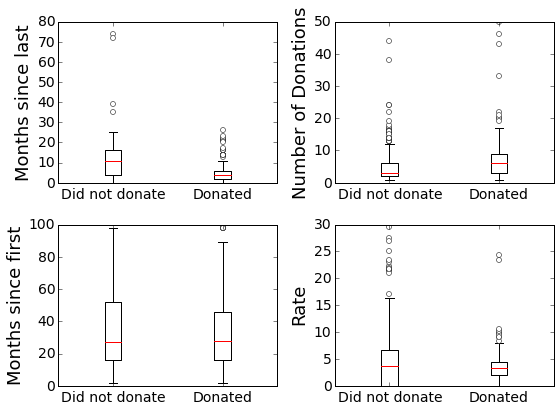

In [615]:
fprops = dict(marker='o', mfc='w', mec='k', markersize=5, linestyle='none', lw=1)
bprops = dict(color='k')
wprops = dict(color='k', linestyle='-', lw=1)
labels = ['Did not donate', 'Donated']

f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
ax0.boxplot([df.months_since_last[df.donation_in_march==0], df.months_since_last[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax0.set_ylabel('Months since last')
ax1.boxplot([df.number_of_donations[df.donation_in_march==0], df.number_of_donations[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax1.set_ylabel('Number of Donations')
ax2.boxplot([df.months_since_first[df.donation_in_march==0], df.months_since_first[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax2.set_ylabel('Months since first')
ax3.boxplot([df.rate[df.donation_in_march==0], df.rate[df.donation_in_march==1]], labels=labels, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
ax3.set_ylabel('Rate')
plt.tight_layout()

In [616]:
df[df['donation_in_march'] == 1].corr().applymap(lambda x: round(x, 2))

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,rate,donated_in_last_12months
id_number,1.00,0.06,0.07,0.12,NaN,0.06,-0.11
months_since_last,0.06,1.00,-0.17,0.10,NaN,-0.06,-0.85
number_of_donations,0.07,-0.17,1.00,0.71,NaN,-0.03,0.18
months_since_first,0.12,0.10,0.71,1.00,NaN,0.48,-0.02
donation_in_march,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,0.06,-0.06,-0.03,0.48,NaN,1.00,0.06
donated_in_last_12months,-0.11,-0.85,0.18,-0.02,NaN,0.06,1.00


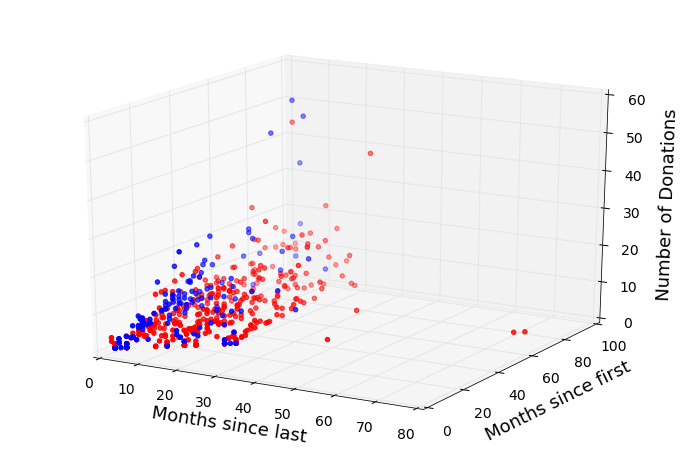

In [617]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.months_since_last[df.donation_in_march == 0],
           df.months_since_first[df.donation_in_march == 0],
           df.number_of_donations[df.donation_in_march == 0], color='r')
ax.scatter(df.months_since_last[df.donation_in_march == 1],
           df.months_since_first[df.donation_in_march == 1],
           df.number_of_donations[df.donation_in_march == 1], color='b')

ax.view_init(elev=20, azim=300)
ax.set_xlim(0, 80)
ax.set_ylim(0, 100)
ax.set_zlim(0, 60)
ax.set_xlabel('Months since last')
ax.set_ylabel('Months since first')
ax.set_zlabel('Number of Donations')

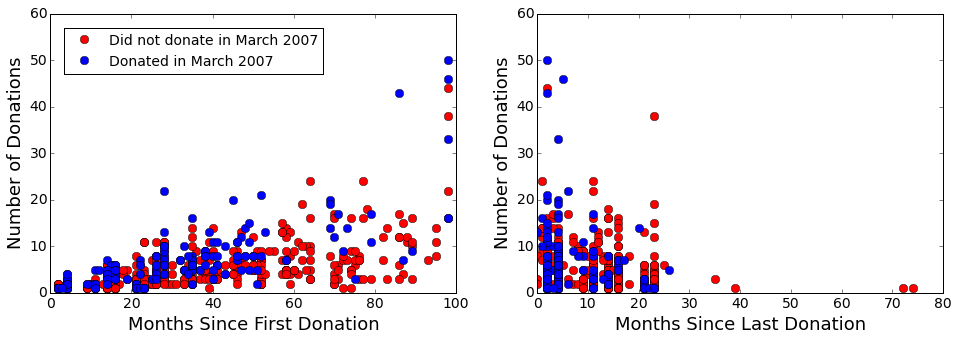

In [618]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax0.plot(df.months_since_first[df.donation_in_march == 0], df.number_of_donations[df.donation_in_march == 0], 'ro', label='Did not donate in March 2007')
ax0.plot(df.months_since_first[df.donation_in_march == 1], df.number_of_donations[df.donation_in_march == 1], 'bo', label='Donated in March 2007')
ax0.set_xlim(0, 100)
ax0.set_ylim(0, 60)
ax0.set_xlabel('Months Since First Donation')
ax0.set_ylabel('Number of Donations')
ax0.legend(loc='upper left')

ax1.plot(df.months_since_last[df.donation_in_march == 0], df.number_of_donations[df.donation_in_march == 0], 'ro', label='Did not donate in March 2007')
ax1.plot(df.months_since_last[df.donation_in_march == 1], df.number_of_donations[df.donation_in_march == 1], 'bo', label='Donated in March 2007')
ax1.set_xlim(0, 80)
ax1.set_ylim(0, 60)
ax1.set_xlabel('Months Since Last Donation')
ax1.set_ylabel('Number of Donations')

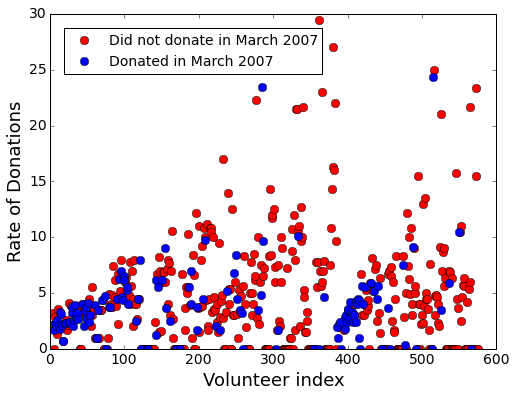

In [619]:
plt.plot(df.index[df.donation_in_march == 0], df.rate[df.donation_in_march == 0], 'ro', label='Did not donate in March 2007')
plt.plot(df.index[df.donation_in_march == 1], df.rate[df.donation_in_march == 1], 'bo', label='Donated in March 2007')
plt.xlabel('Volunteer index')
plt.ylabel('Rate of Donations')
plt.legend(loc='upper left')

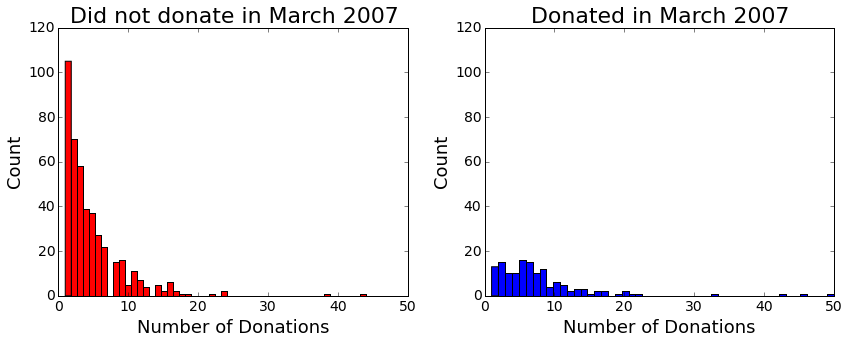

In [620]:
clr = ['red', 'blue']
title = ['Did not donate in March 2007', 'Donated in March 2007']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes):
    ax.hist(df.number_of_donations[df.donation_in_march == i].values, bins=50, color=clr[i])
    ax.set_xlabel('Number of Donations')
    ax.set_ylabel('Count')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 120)
    ax.set_title(title[i])
plt.tight_layout()

Who hasn't donated in a long time?

In [621]:
df.sort_values(['months_since_last'], ascending=False).head(15)

,id_number,months_since_last,number_of_donations,months_since_first,donation_in_march,rate,donated_in_last_12months
385,350,74,1,74,0,0.000000,0
575,74,72,1,72,0,0.000000,0
574,541,39,1,39,0,0.000000,0
384,673,35,3,64,0,9.666667,0
368,281,26,5,49,1,4.600000,0
560,183,25,6,50,0,4.166667,0
327,378,23,2,23,0,0.000000,0
370,117,23,1,23,0,0.000000,0
281,325,23,15,57,0,2.266667,0
383,597,23,3,89,0,22.000000,0


We see that there are volunteers who only donated once a few years ago but never again.

# Test data

In [622]:
column_names = ['id_number', 'months_since_last', 'number_of_donations', 'total_volume', 'months_since_first']
df_test = pd.read_csv('test_blood.csv', header=0, names=column_names)
df_test = df_test.drop(['total_volume'], axis=1)
df_test['rate'] = (df_test['months_since_first'] - df_test['months_since_last']) / df_test['number_of_donations']
df_test['donated_in_last_12months'] = df_test['months_since_last'].apply(lambda x: 0 if x > 12 else 1)
df_test.head()

,id_number,months_since_last,number_of_donations,months_since_first,rate,donated_in_last_12months
0,659,2,12,52,4.166667,1
1,276,21,7,38,2.428571,0
2,263,4,1,4,0.000000,1
3,303,11,11,38,2.454545,1
4,83,4,12,34,2.500000,1


In [623]:
columns = df.columns.tolist()
columns.remove('donation_in_march')
columns.remove('id_number')

from itertools import combinations
features_set = list(combinations(columns, 3)) + list(combinations(columns, 4)) + [tuple(columns)] + list(combinations(columns, 2))
features_set = map(list, features_set)

In [624]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split

In [625]:
for i, features in enumerate(features_set):
    stdsc = StandardScaler()
    X = stdsc.fit_transform(df[features].values)
    X_predict = stdsc.transform(df_test[features].values)
    y = df['donation_in_march'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rf = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True)
    rf.fit(X_train, y_train)
    print i, rf.score(X_test, y_test), rf.oob_score_, log_loss(y_test, rf.predict_proba(X_test)[:,1])

0 0.751445086705 0.75682382134 1.09708706352
1 0.751445086705 0.75682382134 0.90626026835
2 0.739884393064 0.75682382134 1.35879247246
3 0.774566473988 0.75682382134 0.728668408094
4 0.71676300578 0.736972704715 1.15885683294
5 0.699421965318 0.739454094293 1.49499193903
6 0.745664739884 0.734491315136 0.85556329258
7 0.757225433526 0.694789081886 0.452551004579
8 0.739884393064 0.761786600496 0.543756199395
9 0.722543352601 0.751861042184 1.90975466995
10 0.763005780347 0.751861042184 1.4699174195
11 0.705202312139 0.774193548387 2.34289933444
12 0.757225433526 0.776674937965 1.52668086251
13 0.803468208092 0.734491315136 0.477281613672
14 0.791907514451 0.717121588089 0.716227012373
15 0.757225433526 0.741935483871 0.746123902045
16 0.820809248555 0.724565756824 1.44132702264
17 0.728323699422 0.697270471464 0.698922082005
18 0.791907514451 0.677419354839 1.28949954643
19 0.728323699422 0.764267990074 1.34304353304
20 0.745664739884 0.717121588089 1.40738165012
21 0.739884393064 0.74

In [626]:
print features_set[1]
print features_set[22]
print features_set[21]

['months_since_last', 'number_of_donations', 'rate']
['number_of_donations', 'donated_in_last_12months']
['number_of_donations', 'rate']


In [627]:
import time
optimal_features = features_set[1]

stdsc = StandardScaler()
X = stdsc.fit_transform(df[optimal_features].values)
X_predict = stdsc.transform(df_test[optimal_features].values)
y = df['donation_in_march'].values

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True)
rf.fit(X, y)

y_pred_prob = rf.predict_proba(X_predict)[:,1]
df_out = pd.DataFrame({'':df_test.id_number.values, 'Made Donation in March 2007':y_pred_prob})
df_out.to_csv('out_' + str(int(time.time())) + '.csv', index=False, header=True)

### KNN

In [635]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

param_grid = dict(n_neighbors=range(1, 51), weights=['uniform', 'distance'])
for i, features in enumerate(features_set):
    stdsc = StandardScaler()
    X = stdsc.fit_transform(df[features].values)
    X_predict = stdsc.transform(df_test[features].values)
    y = df['donation_in_march'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='log_loss')
    grid.fit(X_train, y_train)
    print i, grid.best_score_, grid.best_params_

0 -0.483585090568 {'n_neighbors': 28, 'weights': 'uniform'}
1 -0.485824434945 {'n_neighbors': 49, 'weights': 'uniform'}
2 -0.52362644063 {'n_neighbors': 49, 'weights': 'uniform'}
3 -0.489808233679 {'n_neighbors': 34, 'weights': 'uniform'}
4 -0.487063902879 {'n_neighbors': 41, 'weights': 'uniform'}
5 -0.497629188131 {'n_neighbors': 47, 'weights': 'uniform'}
6 -0.494904061526 {'n_neighbors': 43, 'weights': 'uniform'}
7 -0.504339498069 {'n_neighbors': 26, 'weights': 'uniform'}
8 -0.484195578034 {'n_neighbors': 38, 'weights': 'uniform'}
9 -0.504615633975 {'n_neighbors': 23, 'weights': 'uniform'}
10 -0.496614210011 {'n_neighbors': 22, 'weights': 'uniform'}
11 -0.506039908646 {'n_neighbors': 50, 'weights': 'uniform'}
12 -0.476325269745 {'n_neighbors': 49, 'weights': 'uniform'}
13 -0.483896710867 {'n_neighbors': 28, 'weights': 'uniform'}
14 -0.463269523588 {'n_neighbors': 37, 'weights': 'uniform'}
15 -0.466170609955 {'n_neighbors': 39, 'weights': 'uniform'}
16 -0.485354934541 {'n_neighbors': 

In [636]:
optimal_features = features_set[14]

stdsc = StandardScaler()
X = stdsc.fit_transform(df[optimal_features].values)
X_predict = stdsc.transform(df_test[optimal_features].values)
y = df['donation_in_march'].values

knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X, y)
y_pred_prob = knn.predict_proba(X_predict)[:,1]
df_out = pd.DataFrame({'':df_test.id_number.values, 'Made Donation in March 2007':y_pred_prob})
df_out.to_csv('out_knn.csv', index=False, header=True)